In [1]:
%cd ..

/home/jovyan/HyperDomainNet


In [11]:
import torch
import matplotlib.pyplot as plt

from core.utils.common import mixing_noise
from core.utils.image_utils import construct_paper_image_grid
from core.utils.example_utils import Inferencer

In [14]:
checkpoints = {
    'im2im': {
        'anastasia': 'im2im_checkpoints/im2im_anastasia.pt',
        'digital_painting_jing': 'im2im_checkpoints/im2im_digital_painting_jing.pt',
        'mermaid': 'im2im_checkpoints/im2im_mermaid.pt',
        'sketch': 'im2im_checkpoints/im2im_sketch.pt',
        'speed_paint': 'im2im_checkpoints/im2im_speed_paint.pt',
        'titan_armin': 'im2im_checkpoints/im2im_titan_armin.pt',
        'titan_erwin': 'im2im_checkpoints/im2im_titan_erwin.pt',
    },
    'td': {
        'anime': 'td_checkpoints/td_anime.pt',
        'monalisa': 'td_checkpoints/td_monalisa.pt',
        'pixar': 'td_checkpoints/td_pixar.pt',
        'sketch': 'td_checkpoints/td_sketch.pt',
        'ukiyo-e': 'td_checkpoints/td_ukiyo-e.pt',
        'botero': 'td_checkpoints/td_botero.pt',
        'werewolf': 'td_checkpoints/td_werewolf.pt',
        'zombie': 'td_checkpoints/td_joker.pt',
        'joker': 'td_checkpoints/td_neanderthal.pt'
    }
}

In [15]:
device = 'cuda:0'

In [16]:
da_type = 'im2im'
target_domain = 'anastasia'

ckpt_path = checkpoints[da_type][target_domain]
ckpt = torch.load(ckpt_path, map_location='cpu')

In [17]:
model = Inferencer(ckpt, device)

In [18]:
z = mixing_noise(
    16, 512, 0, device
)

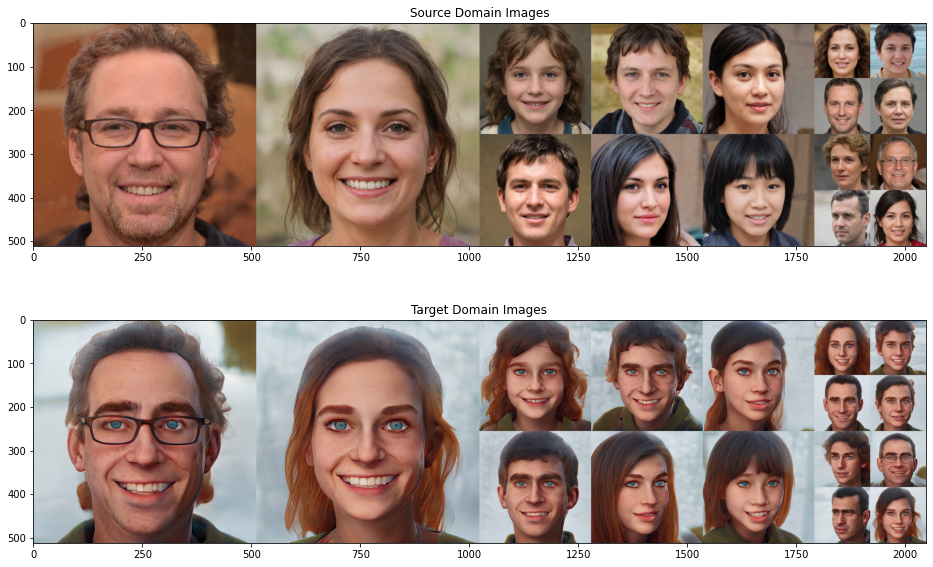

In [19]:
src_im, trg_im = model(z, truncation=0.5)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(16, 10))

ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')

ax[1].imshow(trg_im)
ax[1].set_title('Target Domain Images')

plt.show()

In [20]:
da_type = 'td'
target_domain = 'anime'

ckpt_path = checkpoints[da_type][target_domain]
ckpt = torch.load(ckpt_path, map_location='cpu')

In [21]:
model = Inferencer(ckpt, device)

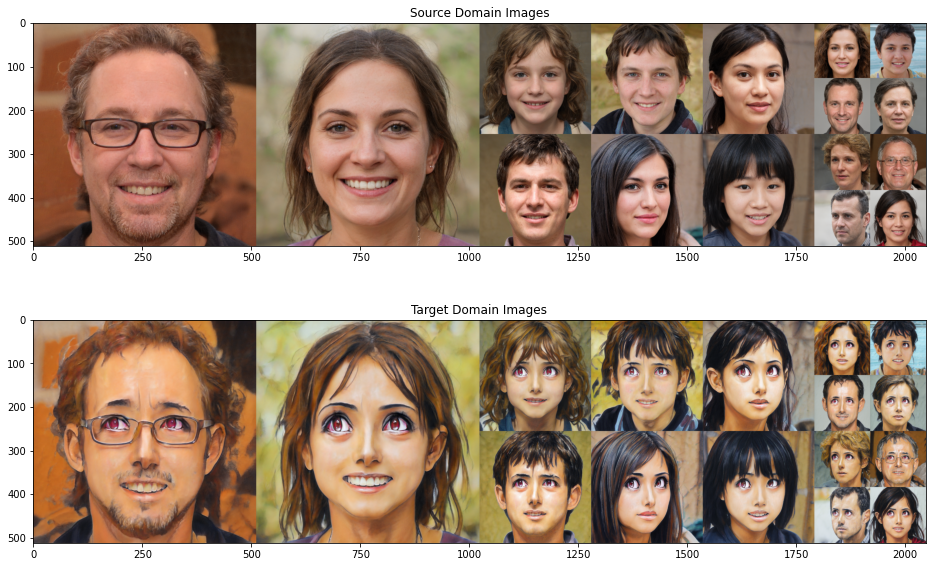

In [22]:
src_im, trg_im = model(z, truncation=0.5)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(16, 10))

ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')

ax[1].imshow(trg_im)
ax[1].set_title('Target Domain Images')

plt.show()